## Génération des coordonnées d'un mouvement circulaire

In [1]:
from math import cos, sin, pi

"""
Fonction générant un tableau de coordonnées t, x et y pour un mouvement circulaire uniforme (sens trigo)
Entrées : xo du centre O,
        yo du centre O,
        rayon,
        angle de départ,
        norme de v0,
        date t maximale,
        nombre souhaité de coordonnées
Résultat : liste contenant la liste de tous les t (en s), la liste de tous les x (en m) et la liste de tous les y (en m).
"""
def modele_circulaire(xo,yo,r,alpha,v0,tmax,nb_points):
    dt=tmax/(nb_points-1)
    w=v0/r
    x=[round(xo+r*cos(pi*alpha/180),3)]
    y=[round(yo+r*sin(pi*alpha/180),3)]
    t=[0]
    for i in range(nb_points-1):
        t.append(round(t[-1]+dt,3))
        x.append(round(xo+r*cos(w*t[-1]+pi*alpha/180),3))
        y.append(round(yo+r*sin(w*t[-1]+pi*alpha/180),3))
    return [t, x, y]


In [6]:
#t,x,y=modele_circulaire(---A COMPLETER---)

'''Exemple'''
t,x,y=modele_circulaire(0,0,0.35,185,2.4,0.8,19)

<div class="alert alert-success" role="alert">
On vérifie visuellement si cela correspond à notre souhait.
</div>

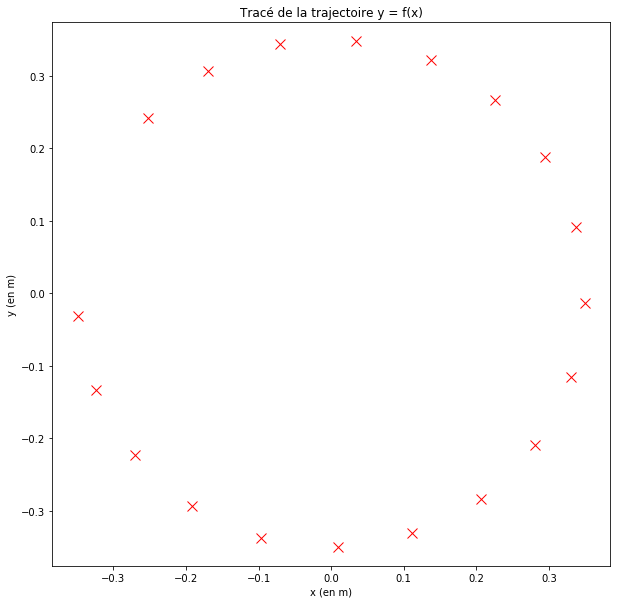

In [7]:
import matplotlib.pyplot as plt
"""
Fonction générant le nuage de points "ordonnée en fonction d'abscisse"
Entrées : coordonnées des abscisses, coordonnées des ordonnées, titre abscisse, titre ordonnée, titre graphique
Résultat : nuage de points "ordonnée en fonction d'abscisse" ou "ordonnée = f(abscisse)"
"""
def nuagedepoints(abscisses,ordonnees,abscisse_title,ordonnee_title,title):
    plt.rcParams['figure.figsize'] = [10, 10]
                            # taille de l'affichage du graphique
    plt.plot(abscisses, ordonnees, linestyle="none" ,marker="x" ,color="red", markersize="10",label="nuage de points")
                            # nuage de points,'none' points non reliés,'x' forme des points (o,-,+,s)
                            # 'red' couleur (blue, green, cyan, magenta, yellow, black)
                            # '10' taille des points
                            # affiche la légende
    plt.axis('equal')       # repère orthonormé
    plt.xlabel(abscisse_title)      # légende axe des abscisses
    plt.ylabel(ordonnee_title)      # légende axe des ordonnées
    plt.title(title)        # affiche un titre
    
nuagedepoints(x,y,'x (en m)','y (en m)','Tracé de la trajectoire y = f(x)')
plt.show()

<div class="alert alert-success" role="alert">
Si cela vous convient, nous allons enregistrer les coordonnées dans le fichier coordonnees_mouvement_circulaire.txt présent dans le même dossier que le notebook.
</div>

In [8]:
"""
Fonction écrivant les coordonnées t, x et y dans un fichier .txt déjà EXISTANT
(avec le point-virgule comme séparateur entre les données)
Entrées : tableau de valeurs t, x et y, nom du fichier
Résultat : le fichier est modifié (suppression du contenu précédent) avec les coordonnées t (en s), x (en m) et y (en m)
"""
def modification_fichier(t,x,y,name):
    sep=";"
    f = open(name,"w") # r= read, w = write
    data=[["Pointages AviMeca"],["t;x;y"],["(s);(m);(m)"]] # on initialise le tableau des données avec les en-têtes d'un fichier semblant provenir d'Aviméca
    l=len(t) # nombre de lignes du tableau
    for i in range(l):
        data.append([str(t[i]),str(x[i]),str(y[i])]) # on convertit les valeurs en texte que l'on ajoute sous d'une liste

    for valeur in data:
        ligne = sep.join(valeur) + "\n"
        ligne = ligne.replace("." , ",") #change les points en virgule => format numérique différent sur python et sur Regressi ou tableur
        f.write(ligne)
    f.close() #on referme le fichier
    print("Le fichier",name,"a bien été modifié.")

modification_fichier(t,x,y,"coordonnees_mouvement_circulaire.txt")

Le fichier coordonnees_mouvement_circulaire.txt a bien été modifié.
